<h1 style="background-color:black
;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 100px 100px; color:#40E0D0"> Impact of COVID-19  on Digital Learning Platform </h1><a id=0></a>

In [67]:
!pip install numpy pandas matplotlib.pyplot seaborn  --upgrade --quite

!pip install plotly --upgrade 


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --quite


In [68]:
import pandas as pd
import numpy as np
import datetime
import glob
import copy
from plotly import subplots
from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import missingno as msno
import seaborn as sns

In [69]:
import matplotlib.style as style

style.use("fivethirtyeight")
style.use('seaborn-poster')

plt.rcParams['font.family'] = 'sans-serif'

In [70]:
path='../input/learnplatform-covid19-impact-on-digital-learning/engagement_data'
filepath=glob.glob(path+'/*')
datalist=[]
for file in filepath:
    df=pd.read_csv(file)
    d_id=file.split('/')[4].split('.')[0]
    df["d_id"] = d_id
    datalist.append(df)
engage_df=pd.concat(datalist)


In [71]:
engage_df.head()

,time,lp_id,pct_access,engagement_index,d_id
0,2020-01-01,92844.0,0.01,0.68,6345
1,2020-01-01,64838.0,0.01,0.68,6345
2,2020-01-01,94058.0,0.00,NaN,6345
3,2020-01-01,26488.0,0.03,26.21,6345
4,2020-01-01,32340.0,0.01,0.11,6345


<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Engagement data Information </h1><a id=0></a>



| time |: Date

| lp_id |: Product ID

| pct_access |: Percentage of students in this school district who have at least one page visited on a certain day

| engagement_index |: The total number of pages visited by the school district per thousand students in this product

For example, if Area A’s participation index for product X on August 10, 2021 is 26666.66, it means that on August 10, 2021, there will be 26666.66 page load events per 1,000 students for product X

In [72]:
engage_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22324190 entries, 0 to 41427
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   time              object 
 1   lp_id             float64
 2   pct_access        float64
 3   engagement_index  float64
 4   d_id              object 
dtypes: float64(3), object(2)
memory usage: 1021.9+ MB


***Insights:***

1. lp_id is float let's convert Ip_id from float to int numeric type
2. time is object let's convert time from object to datetime
3. d_id is object let's convert d_id from object to int numeric type

In [73]:
engage_df['lp_id']= engage_df['lp_id'].fillna(0.0).astype(int)

In [74]:
engage_df['time']= pd.to_datetime(engage_df['time'])

In [75]:
engage_df['d_id']=engage_df['d_id'].astype(int)

In [76]:
engage_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22324190 entries, 0 to 41427
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   time              datetime64[ns]
 1   lp_id             int64         
 2   pct_access        float64       
 3   engagement_index  float64       
 4   d_id              int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 1021.9 MB


In [77]:
#Use the Method describe to obtain a statistical summary of the Engagement data
engage_df.describe()

,lp_id,pct_access,engagement_index,d_id
count,2.232419e+07,2.231074e+07,1.694578e+07,2.232419e+07
mean,5.470747e+04,5.042399e-01,1.676063e+02,5.237180e+03
std,2.647174e+04,3.180568e+00,1.682223e+03,2.644058e+03
min,0.000000e+00,0.000000e+00,1.000000e-02,1.000000e+03
25%,3.085100e+04,0.000000e+00,3.700000e-01,2.956000e+03
50%,5.500700e+04,2.000000e-02,1.920000e+00,4.929000e+03
75%,7.766000e+04,9.000000e-02,1.365000e+01,7.675000e+03
max,9.999100e+04,1.000000e+02,2.130455e+05,9.927000e+03


<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Missing Values </h1><a id=0></a>

Let's check if there are any missing values in the data

In [78]:
missing_values = engage_df.isna().sum()
missing_values

time                      0
lp_id                     0
pct_access            13447
engagement_index    5378409
d_id                      0
dtype: int64

***Insights:***
The engagement_index and pct_access columns has some missing data. We can replace the missing values of the columns with the mean of the columns  using the method replace()

In [79]:
mean=engage_df['engagement_index'].mean()
engage_df['engagement_index'].replace(np.nan,mean, inplace=True)

In [80]:
mean=engage_df['pct_access'].mean()
engage_df['pct_access'].replace(np.nan,mean, inplace=True)

In [81]:
missing_values = engage_df.isna().sum().to_dict()
missing_values_df = pd.DataFrame(list(missing_values.items()), columns=['Column', 'Missing_Values'])

fig = px.bar(missing_values_df,
       x = 'Column',
       y = 'Missing_Values',
       template = 'plotly_dark',
       title = 'Missing Values')
fig.show()

***Insights:***
Now we have clean data and no missing data in engage_df

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0"> Removing Outliers </h1><a id=0></a>

There seems to be some outliers in the engagement_index column. Let's check them.

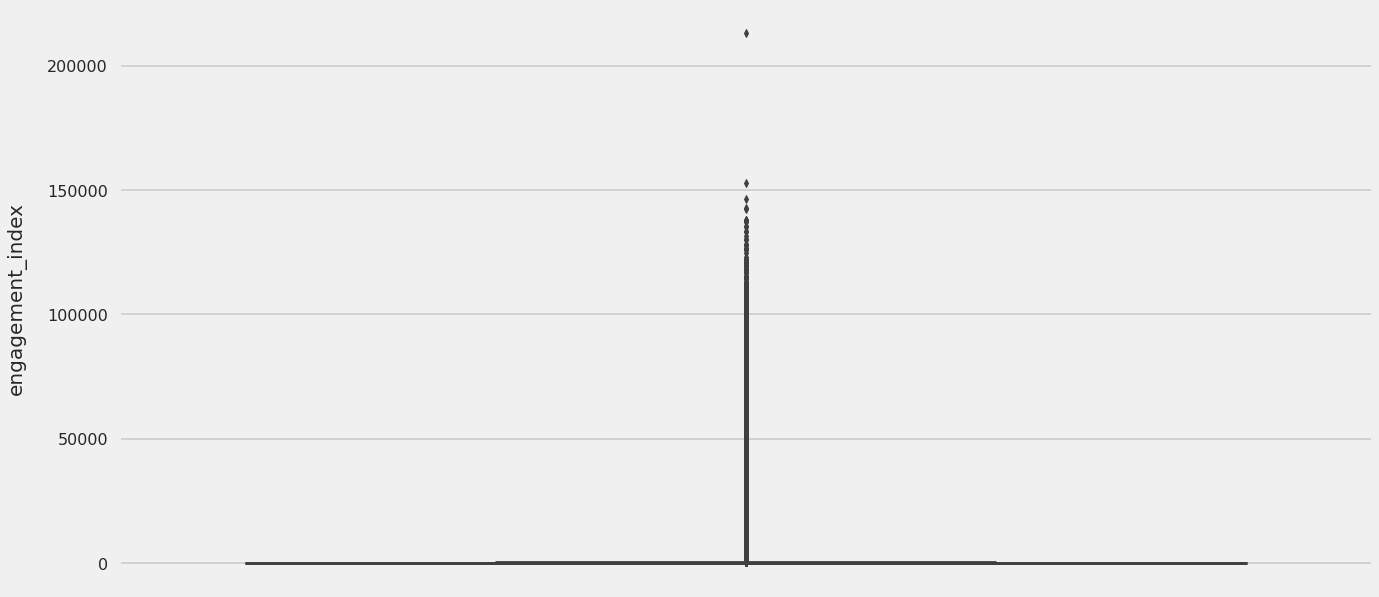

In [82]:
plt.figure(figsize=(20,10))
sns.boxplot(y=engage_df.engagement_index);
plt.ylabel('engagement_index', fontsize=20, labelpad=20);

***Insights:***

 here are some engagement_index  above 150000.00.  Let's drop those Values from data


In [83]:
engage_df = engage_df[engage_df.engagement_index < 150000.00]

In [84]:
districts_df=pd.read_csv('../input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv')

In [85]:
districts_df.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
districts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Missing Values </h1><a id=0></a>

Let's check if there are any missing values in the data

In [87]:
missing_values = districts_df.isna().sum()
missing_values

district_id                   0
state                        57
locale                       57
pct_black/hispanic           57
pct_free/reduced             85
county_connections_ratio     71
pp_total_raw                115
dtype: int64

***Insights:***
There are  some missing data. Let's drop the rows in the data with missing values


In [88]:
districts_df.dropna(thresh=6, inplace=True)

In [89]:
missing_values = districts_df.isna().sum()
missing_values

district_id                  0
state                        0
locale                       0
pct_black/hispanic           0
pct_free/reduced            22
county_connections_ratio     4
pp_total_raw                50
dtype: int64

In [90]:
state = districts_df['state'].value_counts()
fig = px.pie(state, 
             values = state.values, 
             names = state.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

In [91]:
local = districts_df['locale'].value_counts()
fig = px.pie(local, 
             values = local.values, 
             names = local.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

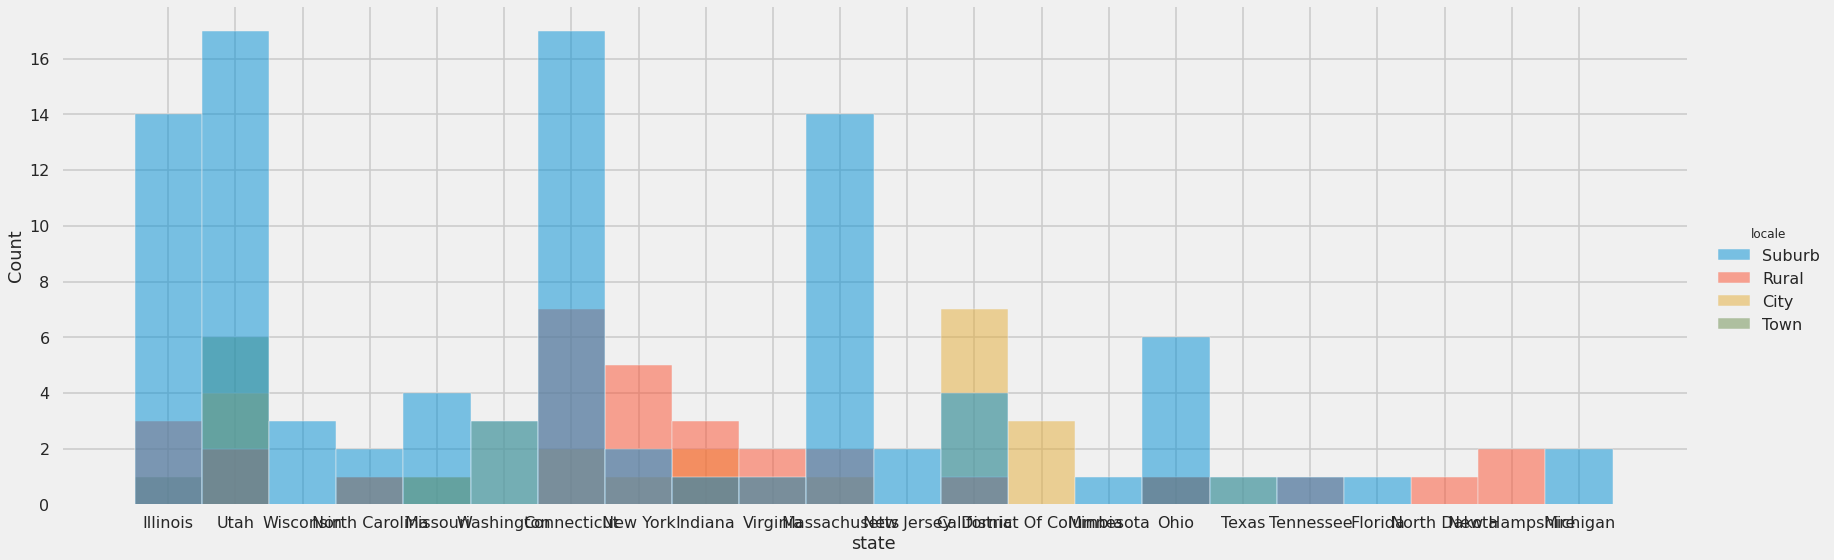

In [92]:
sns.displot(data=districts_df, x='state', hue= 'locale', height=8, aspect=3)

In [93]:
pct_black_hispanic = districts_df['pct_black/hispanic'].value_counts()
pct_black_hispanic

[0, 0.2[      106
[0.2, 0.4[     24
[0.4, 0.6[     16
[0.6, 0.8[     11
[0.8, 1[        7
Name: pct_black/hispanic, dtype: int64

In [94]:
pct_black_hispanic = districts_df['pct_black/hispanic'].value_counts()
fig = px.pie(pct_black_hispanic, 
             values = pct_black_hispanic.values, 
             names = pct_black_hispanic.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()


In [95]:
pct_black_hispanic = districts_df['pct_black/hispanic'].value_counts()
fig = px.pie(pct_black_hispanic, 
             values = pct_black_hispanic.values, 
             names = pct_black_hispanic.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

In [96]:
county_connections_ratio = districts_df['county_connections_ratio'].value_counts()
fig = px.pie(county_connections_ratio, 
             values = county_connections_ratio.values, 
             names = county_connections_ratio.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

In [97]:
pp_total_raw = districts_df['pp_total_raw'].value_counts()
fig = px.pie(pp_total_raw, 
             values = pp_total_raw.values, 
             names = pp_total_raw.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()


<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  District data information  </h1><a id=0></a>

| district_id |: School district ID

| state |: The state where the school district is located

| locale |: The locale classification divides the U.S. territory into four types of regions: urban, suburban, town, and rural

| pct_black/hispanic |: According to 2018-19 NCES data, the percentage of students identified as black or Hispanic in the region

| pct_free/reduced |: Percentage of regional students with 2018-19 NCES data who are eligible for free or reduced price lunch

| county_connections_ratio |: Ratio of high-speed internet among residents

| pp_total_raw | Total expenditure per student for the project (the sum of local and federal expenditures). Expenditure data is school-by-school, and we use average values to represent the expenditures of a given school district.

In [98]:
products_df=pd.read_csv('../input/learnplatform-covid19-impact-on-digital-learning/products_info.csv')

In [99]:
products_df.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [100]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Product data information  </h1><a id=0></a>

| LP ID|: Product ID

| URL |: web link for a specific product

| Product Name |: Specific product name

| Provider/Company Name |: Product supplier name

| Sector(s) |: The education sector that uses the product

| Primary Essential Function |: The basic function of the product. There are two layers of labels. The product was first marked in one of three categories: LC = learning and curriculum, CM = classroom management, and SDO = school and district operations

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0">  Missing Values </h1><a id=0></a>

Let's check if there are any missing values in the data

In [101]:
missing_values = products_df.isna().sum()
missing_values

LP ID                          0
URL                            0
Product Name                   0
Provider/Company Name          1
Sector(s)                     20
Primary Essential Function    20
dtype: int64

***Insights:***
There are  some missing data. Let's drop the rows in the data with missing values

In [102]:
products_df.dropna(thresh=6, inplace=True)

In [103]:
missing_values = products_df.isna().sum()
missing_values

LP ID                         0
URL                           0
Product Name                  0
Provider/Company Name         0
Sector(s)                     0
Primary Essential Function    0
dtype: int64

***Insights:***
Now we have clean data

In [104]:
products_df['Sector(s)'].value_counts()

PreK-12                          170
PreK-12; Higher Ed; Corporate    115
PreK-12; Higher Ed                65
Corporate                          1
Higher Ed; Corporate               1
Name: Sector(s), dtype: int64

In [105]:
Sector = products_df['Sector(s)'].value_counts()
fig = px.pie(Sector, 
             values = Sector.values, 
             names = Sector.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

In [106]:
Primary_Essential_Function = products_df['Primary Essential Function'].value_counts()
fig = px.pie(Primary_Essential_Function, 
             values = Primary_Essential_Function.values, 
             names = Primary_Essential_Function.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

In [107]:
# merge dataframe using district_id as key
learnPlatform_df = pd.merge(engage_df,districts_df,left_on='d_id',right_on=['district_id'])

In [108]:
learnPlatform_df=pd.merge(learnPlatform_df,products_df,left_on='lp_id',right_on='LP ID')

In [109]:
learnPlatform_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8187970 entries, 0 to 8187969
Data columns (total 18 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   time                        datetime64[ns]
 1   lp_id                       int64         
 2   pct_access                  float64       
 3   engagement_index            float64       
 4   d_id                        int64         
 5   district_id                 int64         
 6   state                       object        
 7   locale                      object        
 8   pct_black/hispanic          object        
 9   pct_free/reduced            object        
 10  county_connections_ratio    object        
 11  pp_total_raw                object        
 12  LP ID                       int64         
 13  URL                         object        
 14  Product Name                object        
 15  Provider/Company Name       object        
 16  Sector(s)         

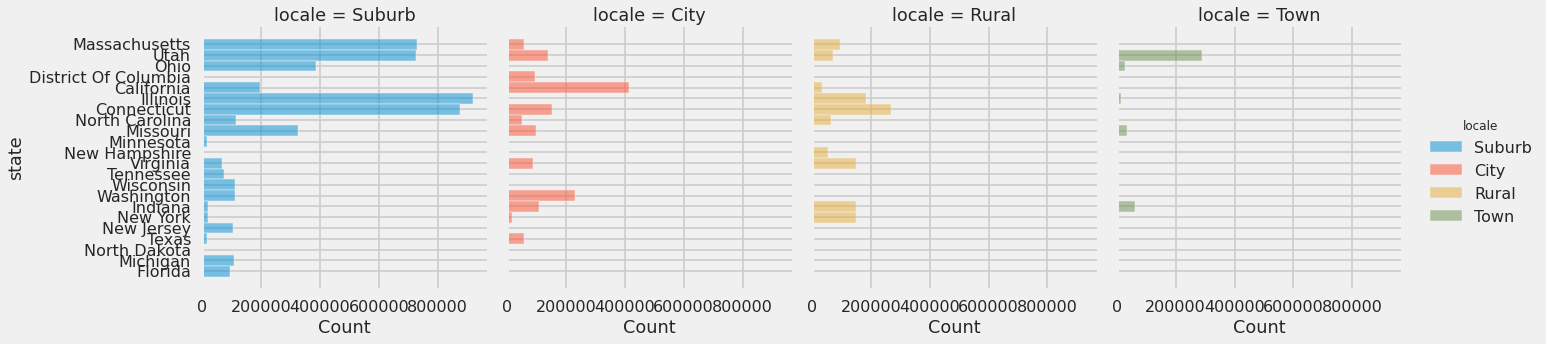

In [110]:
#distribution of state and locale
sns.displot(data=learnPlatform_df, y='state', hue= 'locale', col='locale')

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0"> States with most Districts  </h1><a id=0></a>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'California'),
  Text(1, 0, 'Connecticut'),
  Text(2, 0, 'District Of Columbia'),
  Text(3, 0, 'Florida'),
  Text(4, 0, 'Illinois'),
  Text(5, 0, 'Indiana'),
  Text(6, 0, 'Massachusetts'),
  Text(7, 0, 'Michigan'),
  Text(8, 0, 'Minnesota'),
  Text(9, 0, 'Missouri'),
  Text(10, 0, 'New Hampshire'),
  Text(11, 0, 'New Jersey'),
  Text(12, 0, 'New York'),
  Text(13, 0, 'North Carolina'),
  Text(14, 0, 'North Dakota'),
  Text(15, 0, 'Ohio'),
  Text(16, 0, 'Tennessee'),
  Text(17, 0, 'Texas'),
  Text(18, 0, 'Utah'),
  Text(19, 0, 'Virginia'),
  Text(20, 0, 'Washington'),
  Text(21, 0, 'Wisconsin')])

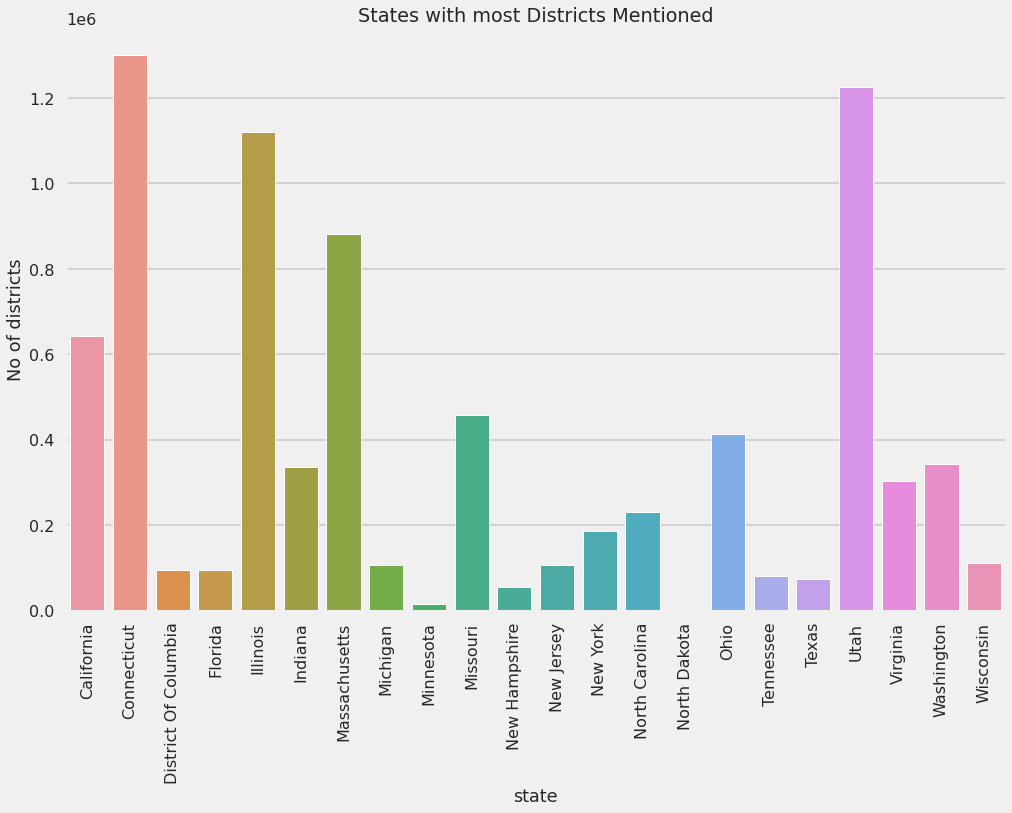

In [111]:
state_district_id = learnPlatform_df.groupby(by ='state').count()[['district_id']]
plt.figure(figsize=(15,10))
plt.title("States with most Districts Mentioned")
plt.ylabel('No of districts')
plt.xlabel('States')
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})
sns.barplot(x=state_district_id .index,y=list(state_district_id ['district_id']))
plt.xticks(rotation=90)

***Insights:***

Connecticut has more Districts as campared to other states

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0"> Locale with most Districts  </h1><a id=0></a>

(array([0, 1, 2, 3]),
 [Text(0, 0, 'City'),
  Text(1, 0, 'Rural'),
  Text(2, 0, 'Suburb'),
  Text(3, 0, 'Town')])

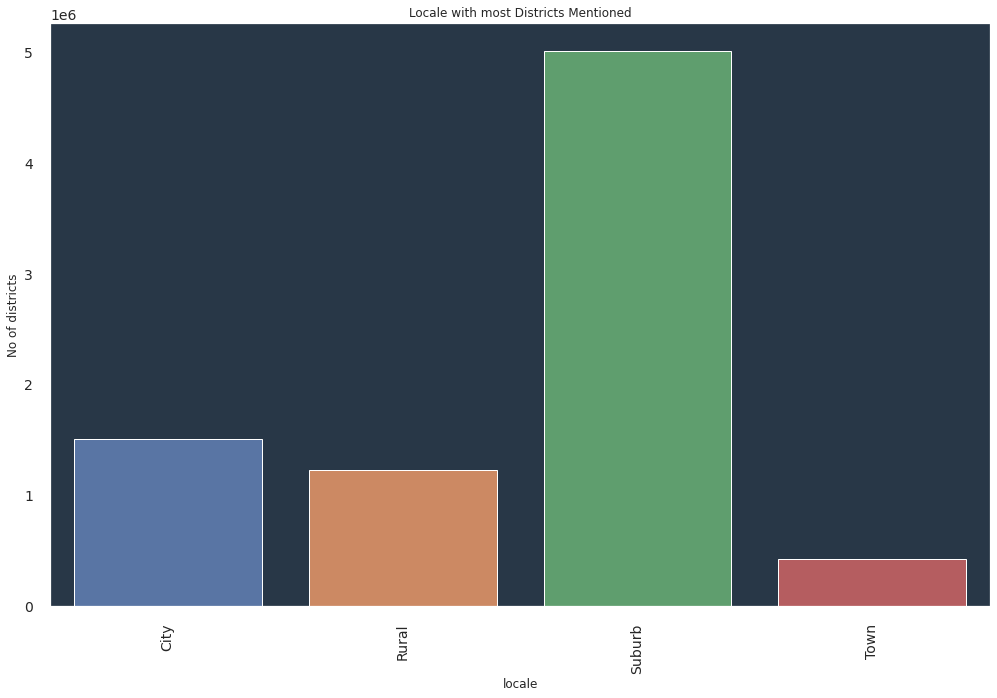

In [112]:
locale_district_id = learnPlatform_df.groupby(by ='locale').count()[['district_id']]
plt.figure(figsize=(15,10))
plt.title("Locale with most Districts Mentioned")
plt.ylabel('No of districts')
plt.xlabel('locale')
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})
sns.barplot(x=locale_district_id .index,y=list(locale_district_id ['district_id']))
plt.xticks(rotation=90)

***Insights:***

Suburb has more Districts as campared to other locales

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '[0, 0.2['),
  Text(1, 0, '[0.2, 0.4['),
  Text(2, 0, '[0.4, 0.6['),
  Text(3, 0, '[0.6, 0.8['),
  Text(4, 0, '[0.8, 1[')])

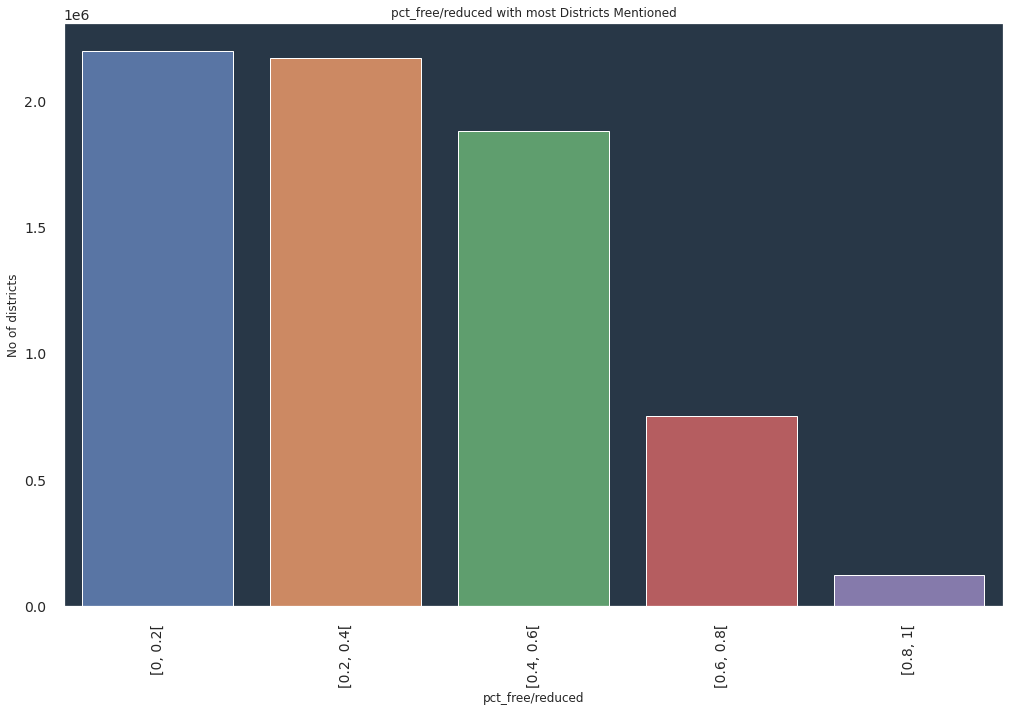

In [113]:
states = learnPlatform_df.groupby(by ='pct_free/reduced').count()[['district_id']]
plt.figure(figsize=(15,10))
plt.title("pct_free/reduced with most Districts Mentioned")
plt.ylabel('No of districts')
plt.xlabel('No. of pct_black/hispanic mentioned')
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})
sns.barplot(x=states.index,y=list(states['district_id']))
plt.xticks(rotation=90)

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0"> Locale with most pct_black/hispanic  </h1><a id=0></a>

(array([0, 1, 2, 3]),
 [Text(0, 0, 'City'),
  Text(1, 0, 'Rural'),
  Text(2, 0, 'Suburb'),
  Text(3, 0, 'Town')])

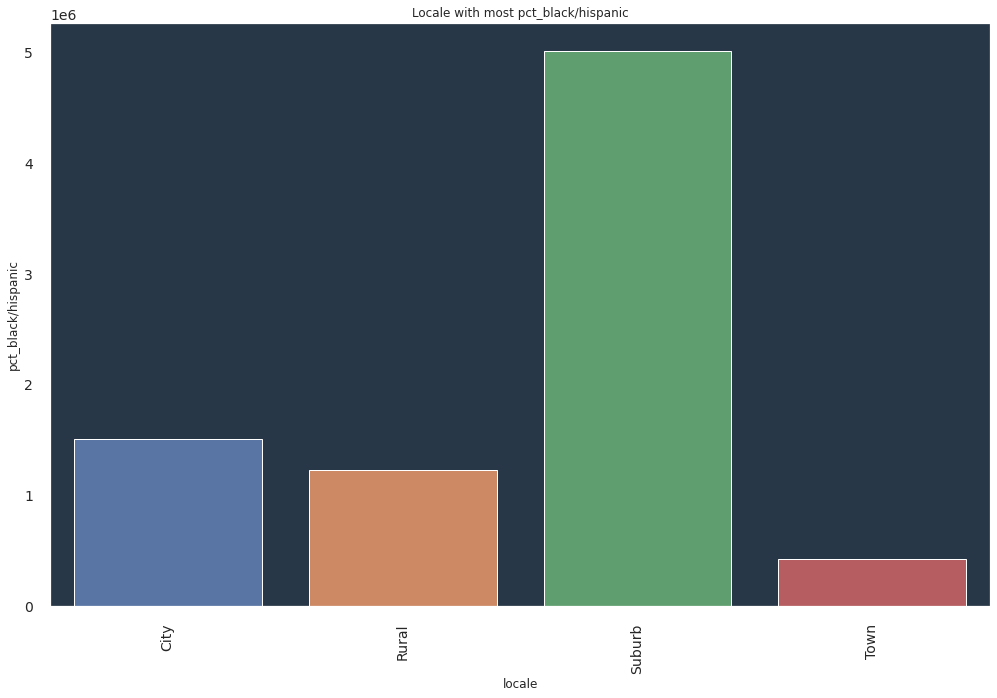

In [114]:
locale_pct_black_hispanic = learnPlatform_df.groupby(by ='locale').count()[['pct_black/hispanic']]
plt.figure(figsize=(15,10))
plt.title("Locale with most pct_black/hispanic")
plt.ylabel('pct_black/hispanic')
plt.xlabel('Locale')
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})
sns.barplot(x=locale_pct_black_hispanic.index,y=list(locale_pct_black_hispanic['pct_black/hispanic']))
plt.xticks(rotation=90)

***Insights:***

Suburb has more pct_black/hispanic as campared to other locales

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0"> Locale  with most pct_free/reduced  </h1><a id=0></a>

(array([0, 1, 2, 3]),
 [Text(0, 0, 'City'),
  Text(1, 0, 'Rural'),
  Text(2, 0, 'Suburb'),
  Text(3, 0, 'Town')])

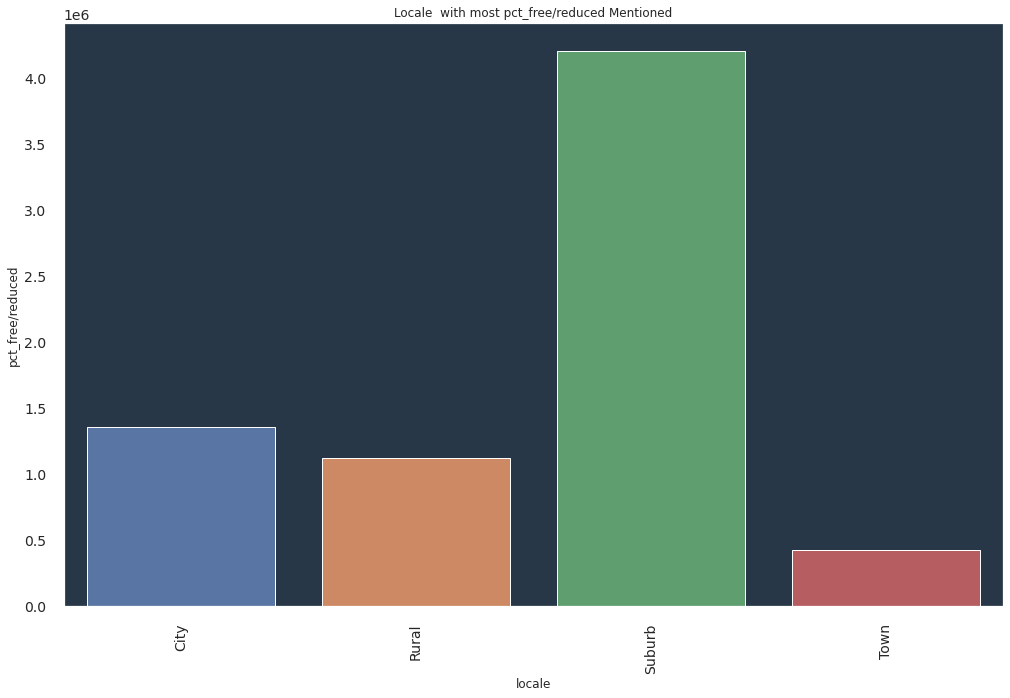

In [115]:
Locale_pct_free_reduced = learnPlatform_df.groupby(by ='locale').count()[['pct_free/reduced']]
plt.figure(figsize=(15,10))
plt.title("Locale  with most pct_free/reduced Mentioned")
plt.ylabel('pct_free/reduced')
plt.xlabel('Locale')
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})
sns.barplot(x=Locale_pct_free_reduced.index,y=list(Locale_pct_free_reduced['pct_free/reduced']))
plt.xticks(rotation=90)

***Insights:***

Suburb has More students with 2018-19 NCES data who are eligible for free or reduced price lunch

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0"> Locale  with most engagement_index  </h1><a id=0></a>

(array([0, 1, 2, 3]),
 [Text(0, 0, 'City'),
  Text(1, 0, 'Rural'),
  Text(2, 0, 'Suburb'),
  Text(3, 0, 'Town')])

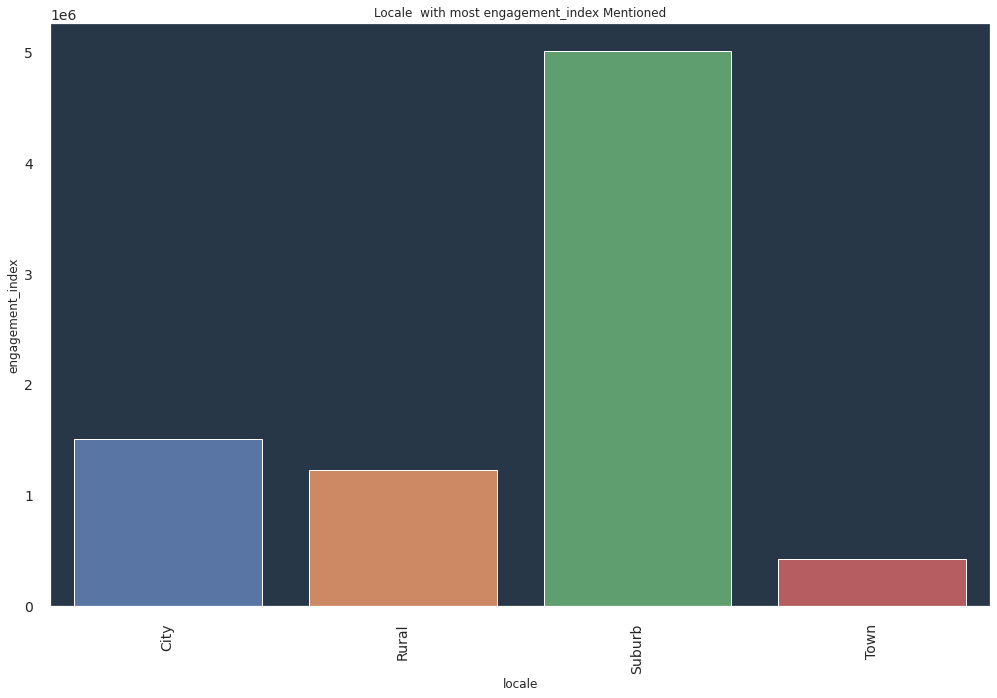

In [116]:
locale_engagement_index = learnPlatform_df.groupby(by ='locale').count()[['engagement_index']]
plt.figure(figsize=(15,10))
plt.title("Locale  with most engagement_index Mentioned")
plt.ylabel('engagement_index')
plt.xlabel('Locale')
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})
sns.barplot(x=locale_engagement_index.index,y=list(locale_engagement_index['engagement_index']))
plt.xticks(rotation=90)

***Insights:***

Suburb has more pages visited for specfic product

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0"> Top 5 Provider/Company </h1><a id=0></a>

Text(0.5, 1.0, 'Top 5 Provider/Company')

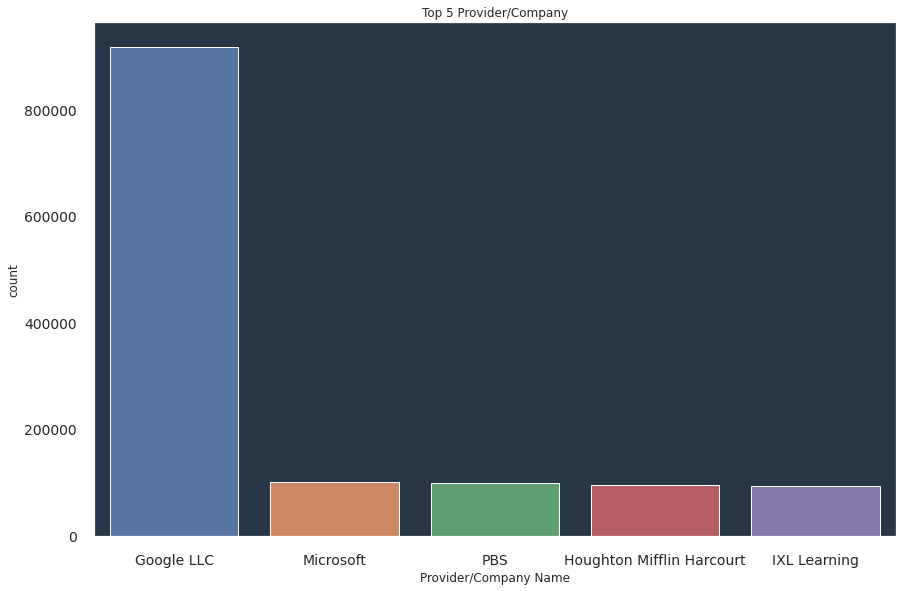

In [117]:
sns.countplot(x="Provider/Company Name", data = learnPlatform_df, order=learnPlatform_df['Provider/Company Name'].value_counts().index[:5])
plt.title("Top 5 Provider/Company")

***Insights:***

Google LLC provide more products

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0"> Top 7 Districts with largest percentage of page loads</h1><a id=0></a>

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '2872'),
  Text(1, 0, '3692'),
  Text(2, 0, '4808'),
  Text(3, 0, '5600'),
  Text(4, 0, '6418'),
  Text(5, 0, '8902'),
  Text(6, 0, '9536')])

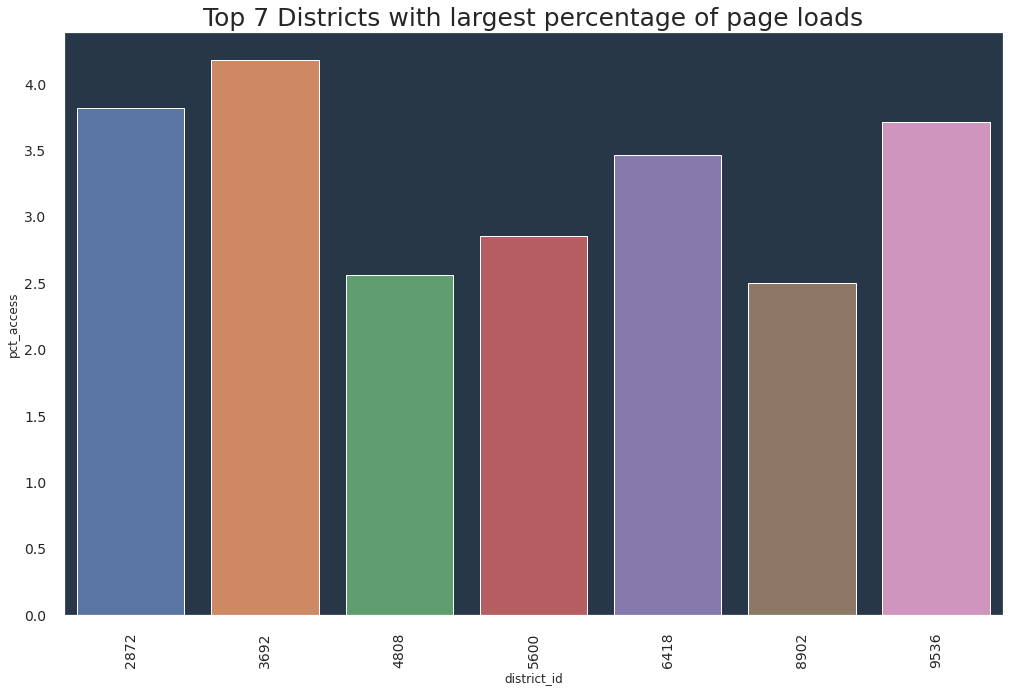

In [118]:
percent_page_load = learnPlatform_df.groupby('district_id').mean().sort_values('pct_access', ascending = False).round(4).head(7).reset_index()
plt.figure(figsize=(15,10))
plt.title("Top 7 Districts with largest percentage of page loads",{'fontsize':25})
plt.ylabel('pct_access')
plt.xlabel('district_id')
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})
sns.barplot(x=percent_page_load.district_id,y=percent_page_load.pct_access)
#y=list(percent_page_load['pct_access']
plt.xticks(rotation=90)


<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0"> Top 5 Product which get more Visiter </h1><a id=0></a>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Google Docs'),
  Text(1, 0, 'Google Classroom'),
  Text(2, 0, 'YouTube'),
  Text(3, 0, 'Canvas'),
  Text(4, 0, 'Meet')])

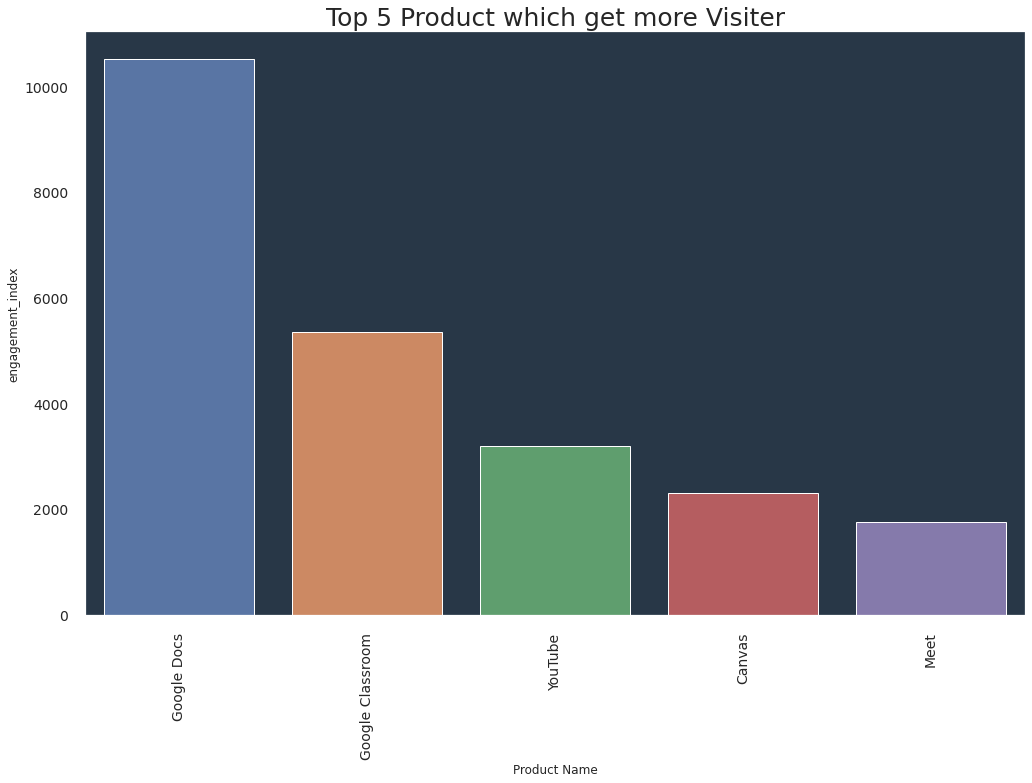

In [119]:
load = learnPlatform_df.groupby('Product Name').mean().sort_values('engagement_index', ascending = False).round(4).head(5).reset_index()
plt.figure(figsize=(15,10))
plt.title("Top 5 Product which get more Visiter",{'fontsize':25})
plt.ylabel('engagement_index')
plt.xlabel('Product Name')
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})
sns.barplot(x=load['Product Name'],y=list(load['engagement_index']))
plt.xticks(rotation=90)

***Insights:***

Google DOCS get more visitor as campared to other prodcut name

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0"> States with most Districts </h1><a id=0></a>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'California'),
  Text(1, 0, 'Connecticut'),
  Text(2, 0, 'District Of Columbia'),
  Text(3, 0, 'Florida'),
  Text(4, 0, 'Illinois'),
  Text(5, 0, 'Indiana'),
  Text(6, 0, 'Massachusetts'),
  Text(7, 0, 'Michigan'),
  Text(8, 0, 'Minnesota'),
  Text(9, 0, 'Missouri'),
  Text(10, 0, 'New Hampshire'),
  Text(11, 0, 'New Jersey'),
  Text(12, 0, 'New York'),
  Text(13, 0, 'North Carolina'),
  Text(14, 0, 'North Dakota'),
  Text(15, 0, 'Ohio'),
  Text(16, 0, 'Tennessee'),
  Text(17, 0, 'Texas'),
  Text(18, 0, 'Utah'),
  Text(19, 0, 'Virginia'),
  Text(20, 0, 'Washington'),
  Text(21, 0, 'Wisconsin')])

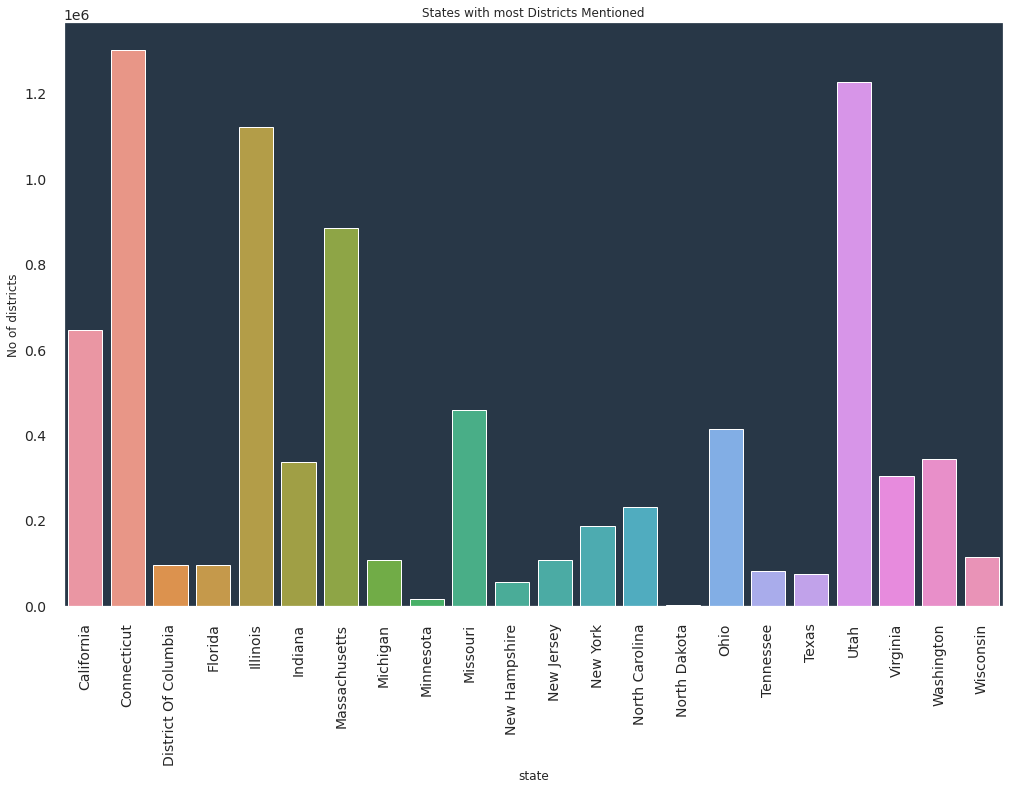

In [120]:
state_district_id = learnPlatform_df.groupby(by ='state').count()[['district_id']]
plt.figure(figsize=(15,10))
plt.title("States with most Districts Mentioned")
plt.ylabel('No of districts')
plt.xlabel('States')
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})
sns.barplot(x=state_district_id.index,y=list(state_district_id ['district_id']))
plt.xticks(rotation=90)

<h1 style="background-color:black
;font-family:newtimeroman;font-size:225%;text-align:left; color:#40E0D0"> Top 15 Provider/Company Name which provide More Product </h1><a id=0></a>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Evite'),
  Text(1, 0, 'Loom, Inc'),
  Text(2, 0, 'Quizlet'),
  Text(3, 0, 'Blooket LLC'),
  Text(4, 0, 'Boom Learning (a dba of Omega Labs Inc.)'),
  Text(5, 0, 'Dropbox'),
  Text(6, 0, 'Newsela'),
  Text(7, 0, 'Cengage Learning'),
  Text(8, 0, 'The Math Learning Center'),
  Text(9, 0, 'RoomRecess.com'),
  Text(10, 0, 'Future US Inc'),
  Text(11, 0, 'Remind101'),
  Text(12, 0, 'Hapara'),
  Text(13, 0, 'Edgenuity Inc.'),
  Text(14, 0, 'MasteryConnect')])

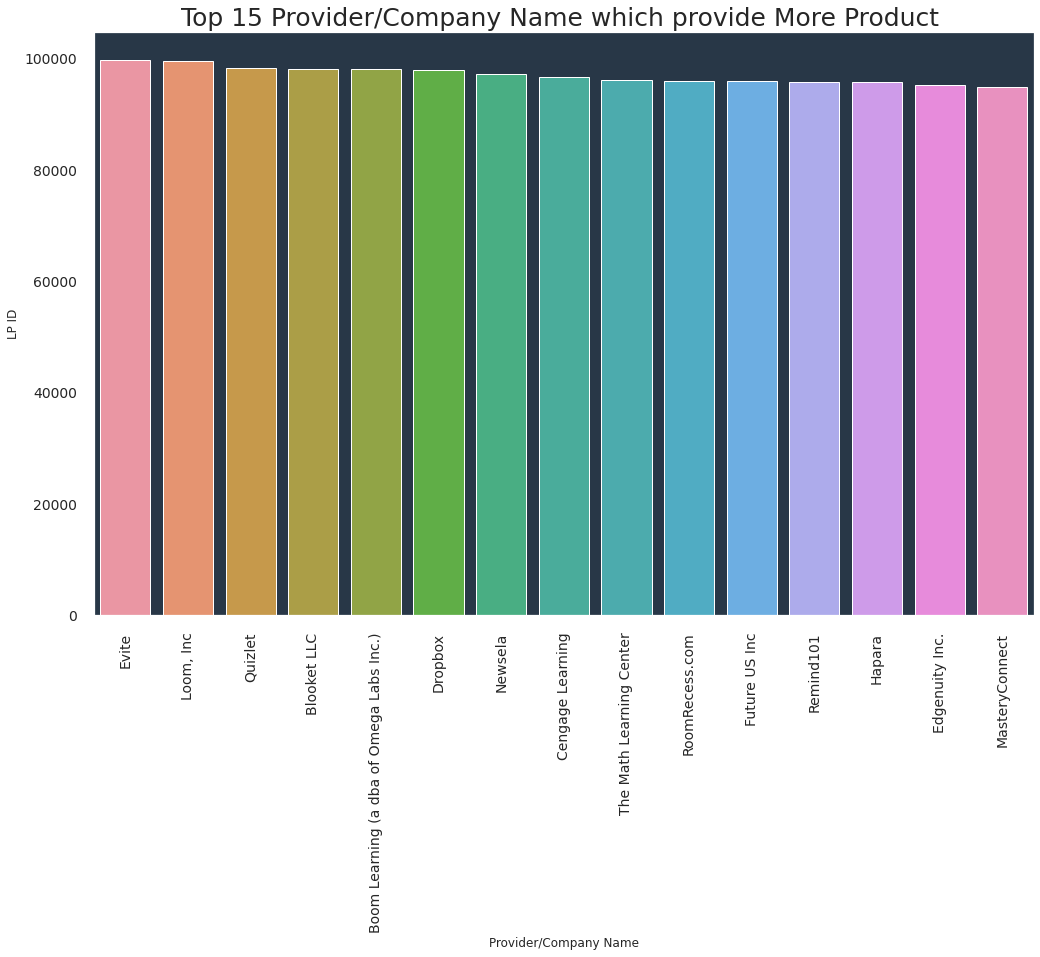

In [121]:
percent_page_load = learnPlatform_df.groupby('Provider/Company Name').mean().sort_values('LP ID', ascending = False).round(4).head(15).reset_index()
plt.figure(figsize=(15,10))
plt.title("Top 15 Provider/Company Name which provide More Product ",{'fontsize':25})
plt.ylabel('LP ID')
plt.xlabel('Provider/Company Name')
sns.set(rc={"axes.facecolor":"#283747", "axes.grid":False,'xtick.labelsize':14,'ytick.labelsize':14})
sns.barplot(x=percent_page_load['Provider/Company Name'],y=percent_page_load['LP ID'])
#y=list(percent_page_load['pct_access']
plt.xticks(rotation=90)